Excellent playlist on GLMs: https://youtube.com/playlist?list=PLl4b1XM725Oc8g3V9p98UeRTOXoAlGEYw&si=0PNZfaKZGiHOdrrD

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/FransRodenburg/Biostatistics/refs/heads/main/GLM/Part%202%20-%20Poisson/example_data_counts.csv"
)

data.head()

,age,apples
0,1.51,0
1,1.14,1
2,0.66,0
3,1.31,1
4,0.28,0


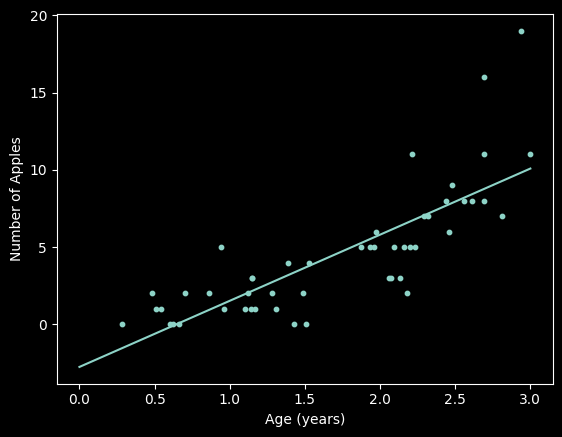

In [22]:
xs, ys = data["age"].to_numpy(), data["apples"].to_numpy()

plt.scatter(data["age"], data["apples"], s=10)
lr = LinearRegression().fit(xs.reshape(-1, 1), ys)
line_xs = np.linspace(0, max(xs)).reshape(-1, 1)
plt.plot(line_xs, lr.predict(line_xs))
plt.xlabel("Age (years)")
plt.ylabel("Number of Apples")
plt.show()

The linear regression line goes negative beyond a certain point. But we cannot have negative counts!

A _link function_ transforms the linear predictor to ensure valid predictions.

Note that the transformation is performed on the data and not on the predictor. New linear predictor is fitted on the transformed data, which should ideally fit better and satisfy the restrictions associated with the data.

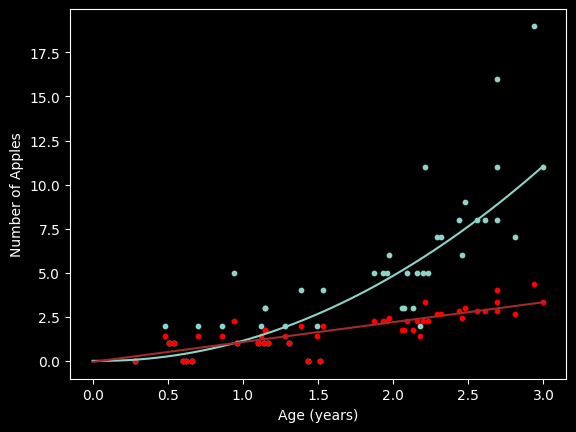

In [ ]:
plt.scatter(data["age"], data["apples"], s=10)
plt.scatter(data["age"], np.sqrt(data["apples"]), s=10, c="red")
lr2 = LinearRegression().fit(xs.reshape(-1, 1), np.sqrt(ys))
plt.plot(line_xs, lr2.predict(line_xs) ** 2)
plt.plot(line_xs, lr2.predict(line_xs), c="brown")
plt.xlabel("Age (years)")
plt.ylabel("Number of Apples")
plt.show()


Since this count data can be modelled with a Poisson regression with a mean of $\lambda$ where $\lambda$ is the average number of apples produced for a given age.
$$y \sim \text{Poisson}(\lambda)$$

> The _canonical link function_ is the only link function that translates the linear predictor to the mean of the chosen probability distribution.

Here, if $\eta := \beta_0 + \beta_1 x$, then, for a Poisson distribution, the canonical link function is the logarithm. 
$$\log(\lambda) = \eta \implies \lambda = \exp(\eta)$$

In the previous example, our link function was $\sqrt{\lambda} = \eta$

/Users/amkhrjee/Developer/stats/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


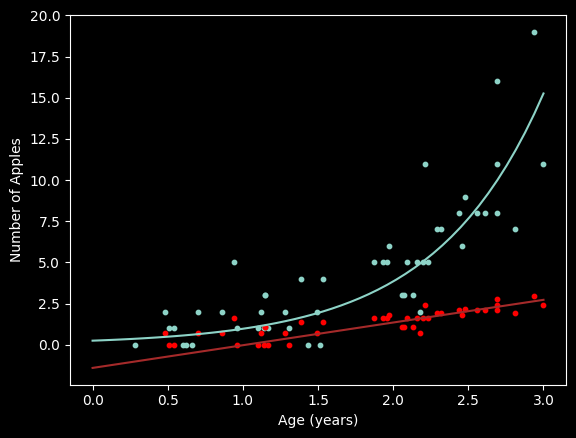

In [43]:
plt.scatter(data["age"], data["apples"], s=10)
plt.scatter(data["age"], np.log(data["apples"]), s=10, c="red")
lr3 = LinearRegression().fit(xs.reshape(-1, 1), np.log(ys + 1e-1))
plt.plot(line_xs, np.exp(lr3.predict(line_xs)))
plt.plot(line_xs, lr3.predict(line_xs), c="brown")
plt.xlabel("Age (years)")
plt.ylabel("Number of Apples")
plt.show()
